In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, GRU
from keras.optimizers import RMSprop
from keras.callbacks import Callback

pd.set_option('mode.chained_assignment', None)

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/HCM_weather.csv', parse_dates=True)
dataset = df[['date','humidi']]
dataset.head(10)
print(dataset.shape)

(4549, 2)


In [ ]:
Tp = 1000

In [ ]:
def plot_train_points(quantity='humidi',Tp=1000):
    plt.figure(figsize=(15,4))
    plt.title("Độ ẩm của {} train data".format(Tp),fontsize=16)
    plt.plot(dataset['humidi'][:Tp],c='k',lw=1)
    plt.grid(True)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

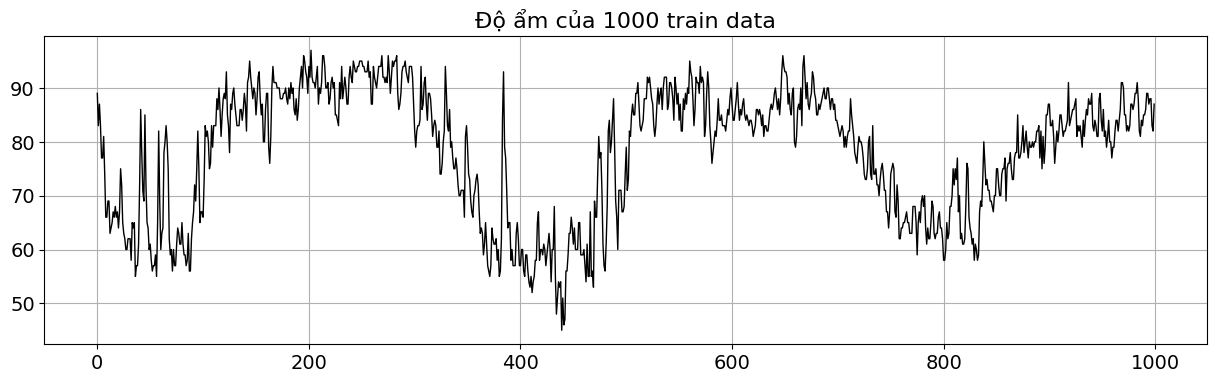

In [ ]:
plot_train_points('humidi',Tp)

In [ ]:
dataset.interpolate(inplace=True)
dataset.dropna(inplace=True)
print(dataset.shape)

(4549, 2)


In [ ]:
train = np.array(dataset['humidi'][:Tp])
test = np.array(dataset['humidi'][Tp:])
print("Train data length:", train.shape)
print("Test data length:", test.shape)

Train data length: (1000,)
Test data length: (3549,)


In [ ]:
train=train.reshape(-1,1)
test=test.reshape(-1,1)


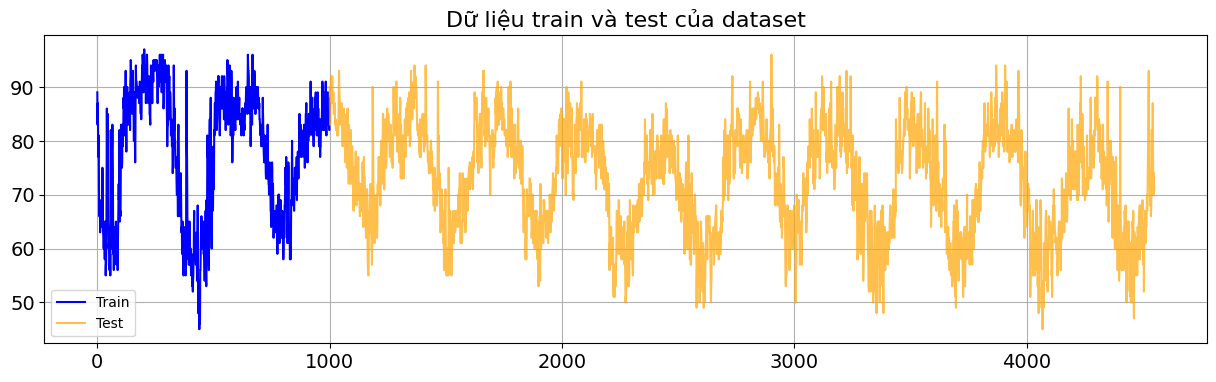

In [ ]:
plt.figure(figsize=(15,4))
plt.title("Dữ liệu train và test của dataset",fontsize=16)
plt.plot(np.arange(Tp),train,c='blue')
plt.plot(np.arange(Tp,4549),test,c='orange',alpha=0.7)
plt.legend(['Train','Test'])
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
step = 8
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))

In [ ]:
def convertToMatrix(data, step):
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

In [ ]:
trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print("Training data shape:", trainX.shape,', ',trainY.shape)
print("Test data shape:", testX.shape,', ',testY.shape)

Training data shape: (1000, 1, 8) ,  (1000,)
Test data shape: (3549, 1, 8) ,  (3549,)


In [ ]:
def build_simple_rnn(num_units=128, embedding=4,num_dense=32,lr=0.001):
    model = Sequential()
    model.add(SimpleRNN(units=num_units, input_shape=(1,embedding), activation="relu"))
    model.add(Dense(num_dense, activation="relu"))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=RMSprop(lr=lr),metrics=['mse'])

    return model

In [ ]:
def build_lstm(num_units=64, embedding=4,num_dense=32,lr=0.001):
    model = Sequential()
    model.add(LSTM(units=num_units, input_shape=(1,embedding), activation="relu"))
    model.add(Dense(num_dense, activation="relu"))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=RMSprop(lr=lr),metrics=['mse'])

    return model

In [ ]:
def build_gru(num_units=64, embedding=4,num_dense=32,lr=0.001):
    model = Sequential()
    model.add(GRU(units=num_units, input_shape=(1,embedding), activation="relu"))
    model.add(Dense(num_dense, activation="relu"))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=RMSprop(lr=lr),metrics=['mse'])

    return model

In [ ]:
model_humidity = build_simple_rnn(num_units=128,num_dense=32,embedding=8,lr=0.0005)
model_humidity.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 128)               17536     
                                                                 
 dense_14 (Dense)            (None, 32)                4128      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 21697 (84.75 KB)
Trainable params: 21697 (84.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_humidity = build_lstm(num_units=128,num_dense=32,embedding=8,lr=0.0005)
model_humidity.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               70144     
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 74305 (290.25 KB)
Trainable params: 74305 (290.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_humidity = build_gru(num_units=128,num_dense=32,embedding=8,lr=0.0005)
model_humidity.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               52992     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 57153 (223.25 KB)
Trainable params: 57153 (223.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch+1) % 50 == 0 and epoch>0:
            print("Epoch number {} done".format(epoch+1))

In [ ]:
batch_size=8
num_epochs = 200
model_humidity.fit(trainX,trainY, epochs=num_epochs, batch_size=batch_size, callbacks=[MyCallback()],verbose=0)

Epoch number 50 done
Epoch number 100 done
Epoch number 150 done
Epoch number 200 done


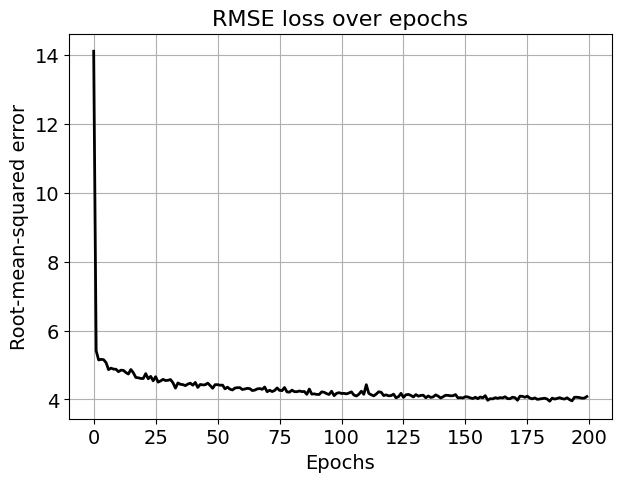

In [ ]:
plt.figure(figsize=(7,5))
plt.title("RMSE loss over epochs",fontsize=16)
plt.plot(np.sqrt(model_humidity.history.history['loss']),c='k',lw=2)
plt.grid(True)
plt.xlabel("Epochs",fontsize=14)
plt.ylabel("Root-mean-squared error",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

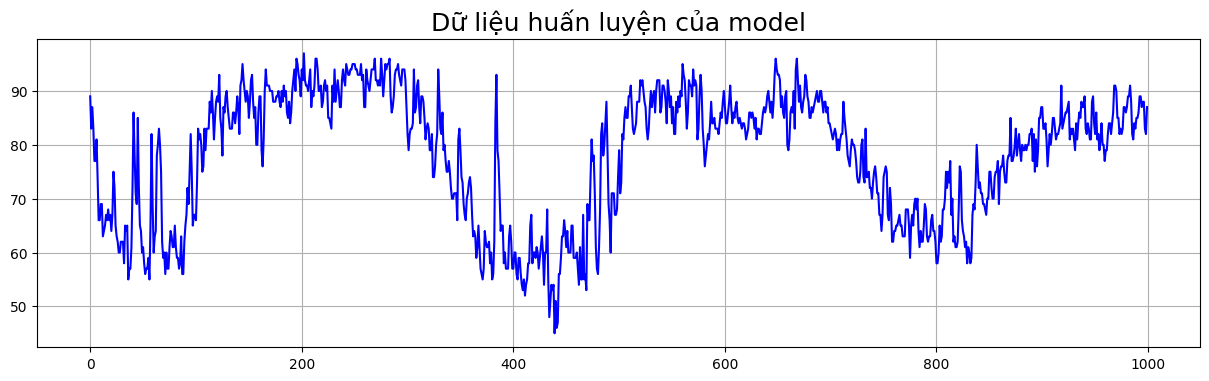

In [ ]:
plt.figure(figsize=(15,4))
plt.title("Dữ liệu huấn luyện của model",fontsize=18)
plt.plot(trainX[:,0][:,0],c='blue')
plt.grid(True)
plt.show()

In [ ]:
trainPredict = model_humidity.predict(trainX)
testPredict= model_humidity.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

111/111 [==============================] - 0s 2ms/step


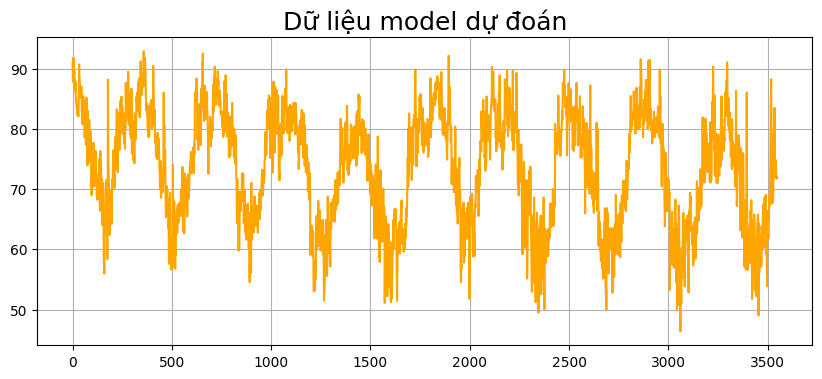

In [ ]:
plt.figure(figsize=(10,4))
plt.title("Dữ liệu model dự đoán",fontsize=18)
plt.plot(testPredict,c='orange')
plt.grid(True)
plt.show()

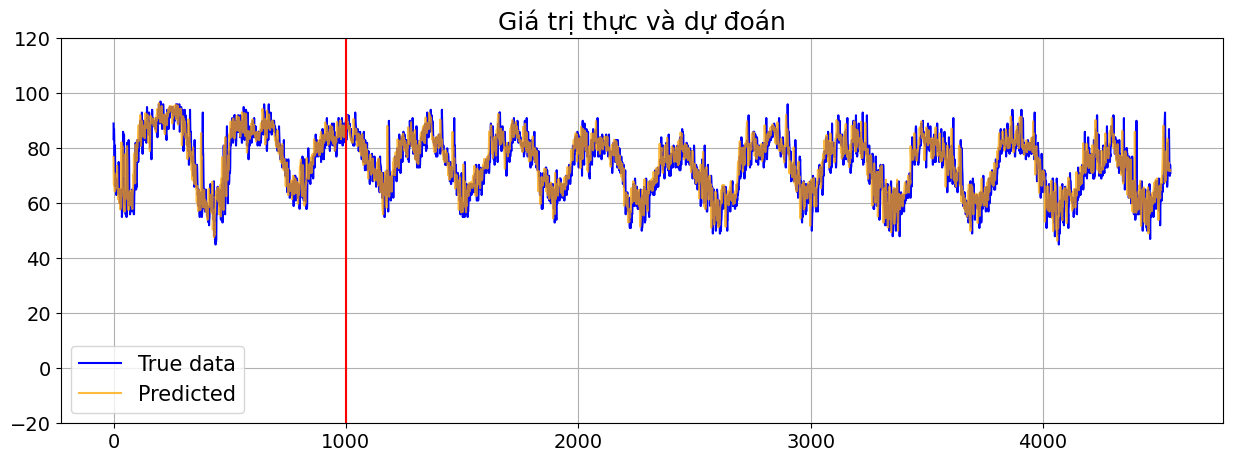

In [ ]:
index = dataset.index.values

plt.figure(figsize=(15,5))
plt.title("Giá trị thực và dự đoán",fontsize=18)
plt.plot(index,dataset['humidi'],c='blue')
plt.plot(index,predicted,c='orange',alpha=0.75)
plt.legend(['True data','Predicted'],fontsize=15)
plt.axvline(x=Tp, c="r")
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-20,120)
plt.show()